# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [106]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly_express as px
from pathlib import Path

%matplotlib inline

In [107]:
# Read the Mapbox API key
mapbox_token = os.getenv("mapbox")

## Load Data

In [108]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year",parse_dates=True)
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010-01-01,Alamo Square,291.182945,372560,1239
2010-01-01,Anza Vista,267.932583,372560,1239
2010-01-01,Bayview,170.098665,372560,1239
2010-01-01,Buena Vista Park,347.394919,372560,1239
2010-01-01,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

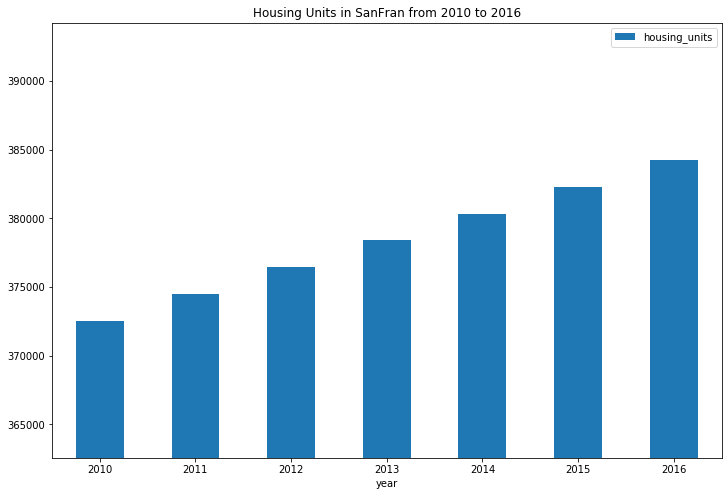

In [109]:
# Calculate the mean number of housing units per year (hint: use groupby) 
temp_df = sfo_data.filter(['year','housing_units']).groupby([sfo_data.index.year]).mean()
min = temp_df.min()['housing_units']
max = temp_df.max()['housing_units']
padding = 10000
temp_df.plot.bar(ylim=(min-padding,max+padding),title="Housing Units in SanFran from 2010 to 2016", rot=0,figsize=(12,8))

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

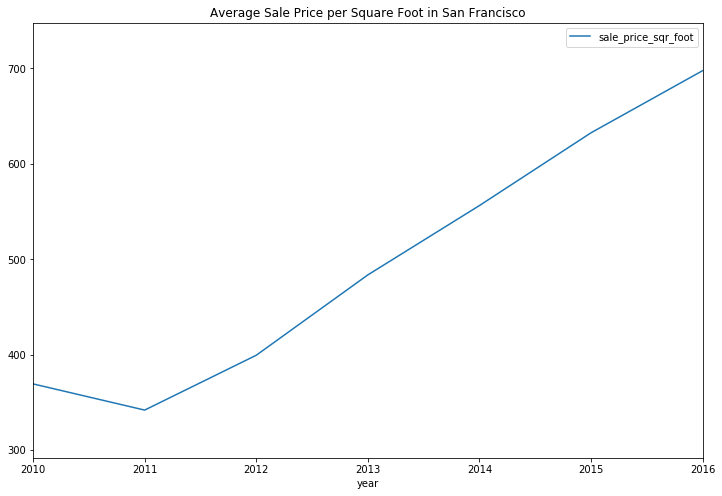

In [110]:
# Calculate the average gross rent and average sale price per square foot
def chart_mean_for_column(df,column_name,title,pad):
    temp_df = df.filter(['year',column_name]).groupby([sfo_data.index.year]).mean()
    min_max = (temp_df.min()[column_name]-pad, temp_df.max()[column_name]+pad)
    temp_df.plot(ylim=min_max,title=title, rot=0, figsize=(12,8))
    
chart_mean_for_column(sfo_data,'sale_price_sqr_foot','Average Sale Price per Square Foot in San Francisco',50)

### Average Sales Price per Year

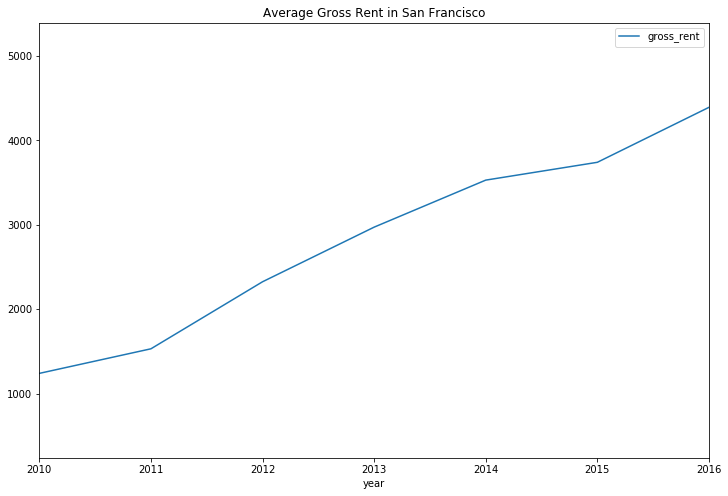

In [111]:
# Plot the Average Gross Rent per Year as a Line Chart 
chart_mean_for_column(sfo_data,'gross_rent','Average Gross Rent in San Francisco',1000)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [112]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_hood = sfo_data.filter(['year','neighborhood','sale_price_sqr_foot']).groupby([sfo_data.index.year,sfo_data['neighborhood']]).mean()
avg_hood

sale_price_sqr_foot
year neighborhood                               
2010 Alamo Square                     291.182945
     Anza Vista                       267.932583
     Bayview                          170.098665
     Buena Vista Park                 347.394919
     Central Richmond                 319.027623
...                                          ...
2016 Telegraph Hill                   903.049771
     Twin Peaks                       970.085470
     Van Ness/ Civic Center           552.602567
     Visitacion Valley                328.319007
     Westwood Park                    631.195426

[397 rows x 1 columns]

In [113]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
avg_hood.hvplot.line(x='year',y='sale_price_sqr_foot',groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [114]:
# Getting the data from the top 10 expensive neighborhoods
top_10 = sfo_data.filter(['neighborhood','sale_price_sqr_foot']).groupby([sfo_data['neighborhood']]).mean()
top_10 = top_10.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


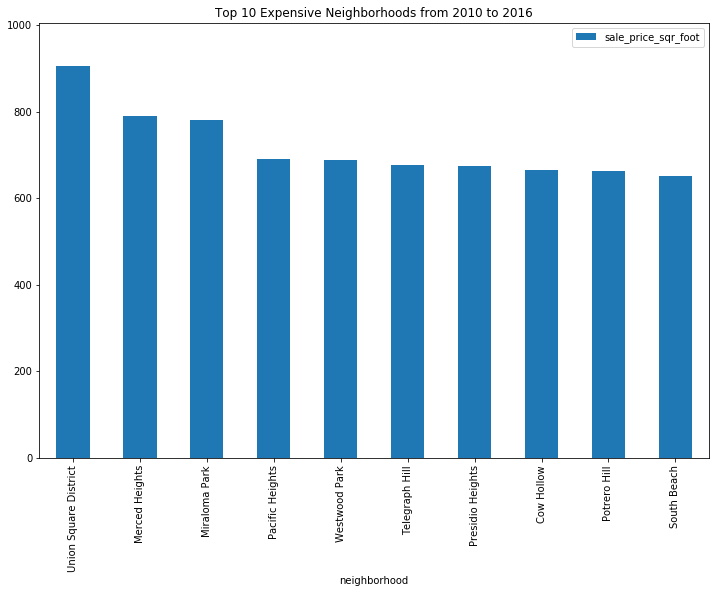

In [115]:
# Plotting the data from the top 10 expensive neighborhoods
min = top_10.min()['sale_price_sqr_foot']
max = top_10.max()['sale_price_sqr_foot']
padding = (max - min) / 2
top_10.plot.bar(ylim=(0,max+100),title="Top 10 Expensive Neighborhoods from 2010 to 2016", rot=90,figsize=(12,8))

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [116]:
all_average = sfo_data.groupby([sfo_data['neighborhood']]).mean()
all_average = all_average.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
all_average

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


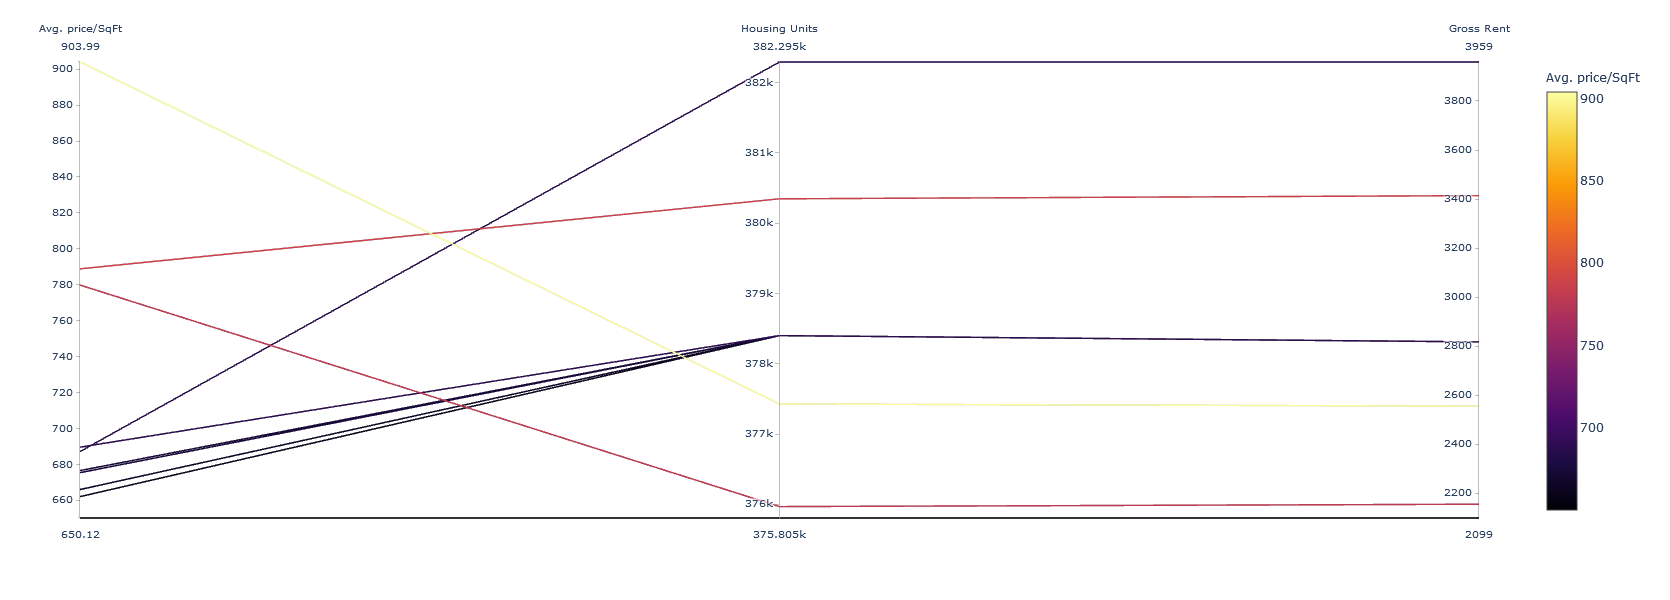

In [117]:
# Parallel Coordinates Plot
parallel_coordinates_plot = px.parallel_coordinates(
        all_average.round(2),
        dimensions=['sale_price_sqr_foot', 'housing_units', 'gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "sale_price_sqr_foot": "Avg. price/SqFt",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent"
        }
    )
    
parallel_coordinates_plot

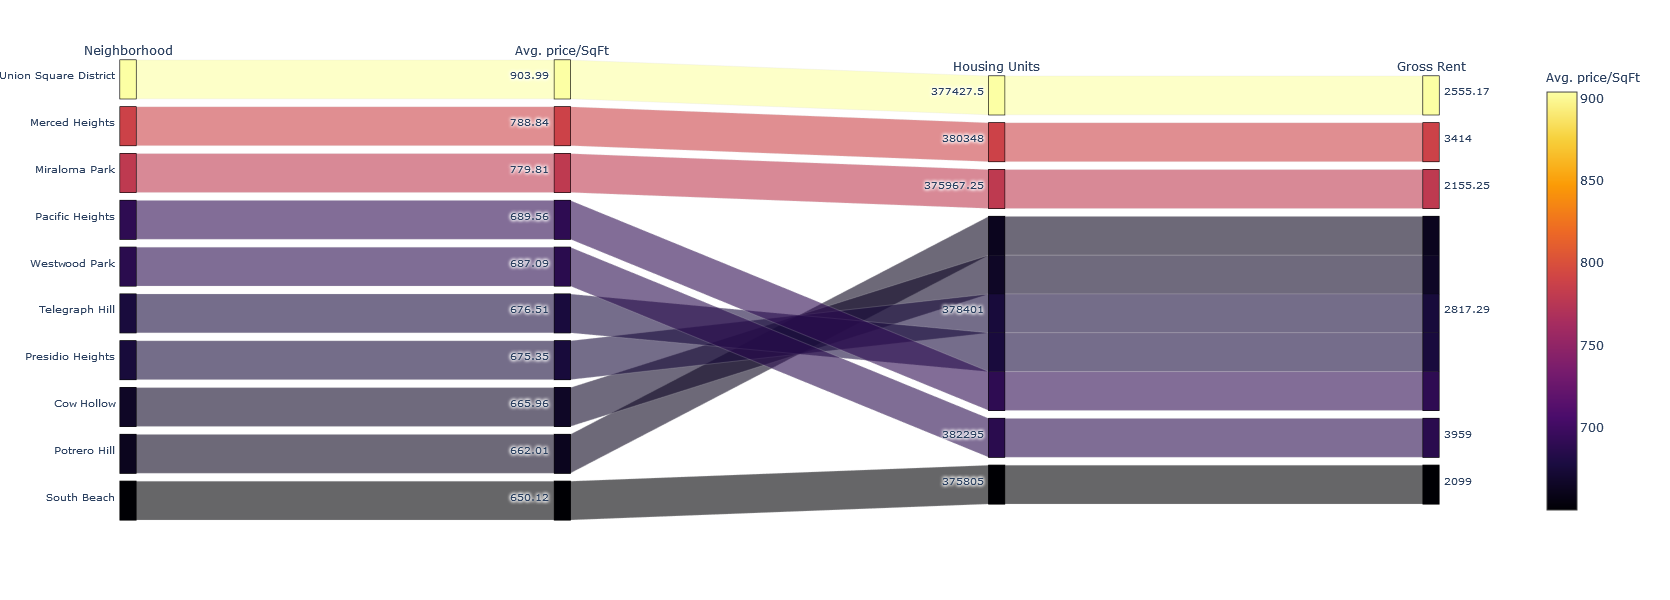

In [118]:
# Parallel Categories Plot
parallel_categories_plot = px.parallel_categories(
        all_average.reset_index().round(2),
        dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Avg. price/SqFt",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent"
        }
    )
    
parallel_categories_plot

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [119]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.set_index('Neighborhood', inplace=True)
df_neighborhood_locations.index.rename("neighborhood", inplace = True) 
df_neighborhood_locations.head()

,Lat,Lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [120]:
# Calculate the mean values for each neighborhood
all_average.round(2)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.99,377427.50,2555.17
Merced Heights,788.84,380348.00,3414.00
Miraloma Park,779.81,375967.25,2155.25
Pacific Heights,689.56,378401.00,2817.29
Westwood Park,687.09,382295.00,3959.00
Telegraph Hill,676.51,378401.00,2817.29
Presidio Heights,675.35,378401.00,2817.29
Cow Hollow,665.96,378401.00,2817.29
Potrero Hill,662.01,378401.00,2817.29


In [121]:
# Join the average values with the neighborhood locations
all_average_new = sfo_data.groupby([sfo_data['neighborhood']]).mean()
all_average_new = all_average_new.sort_values(by='sale_price_sqr_foot', ascending=False)
combined_df = pd.concat([df_neighborhood_locations,all_average_new], axis="columns", join="inner")
combined_df

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.00,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.00,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.00,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.00,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.50,2698.833333
...,...,...,...,...,...
West Portal,37.740260,-122.463880,498.488485,376940.75,2515.500000
Western Addition,37.792980,-122.435790,307.562201,377427.50,2555.166667
Westwood Highlands,37.734700,-122.456854,533.703935,376454.00,2250.500000


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

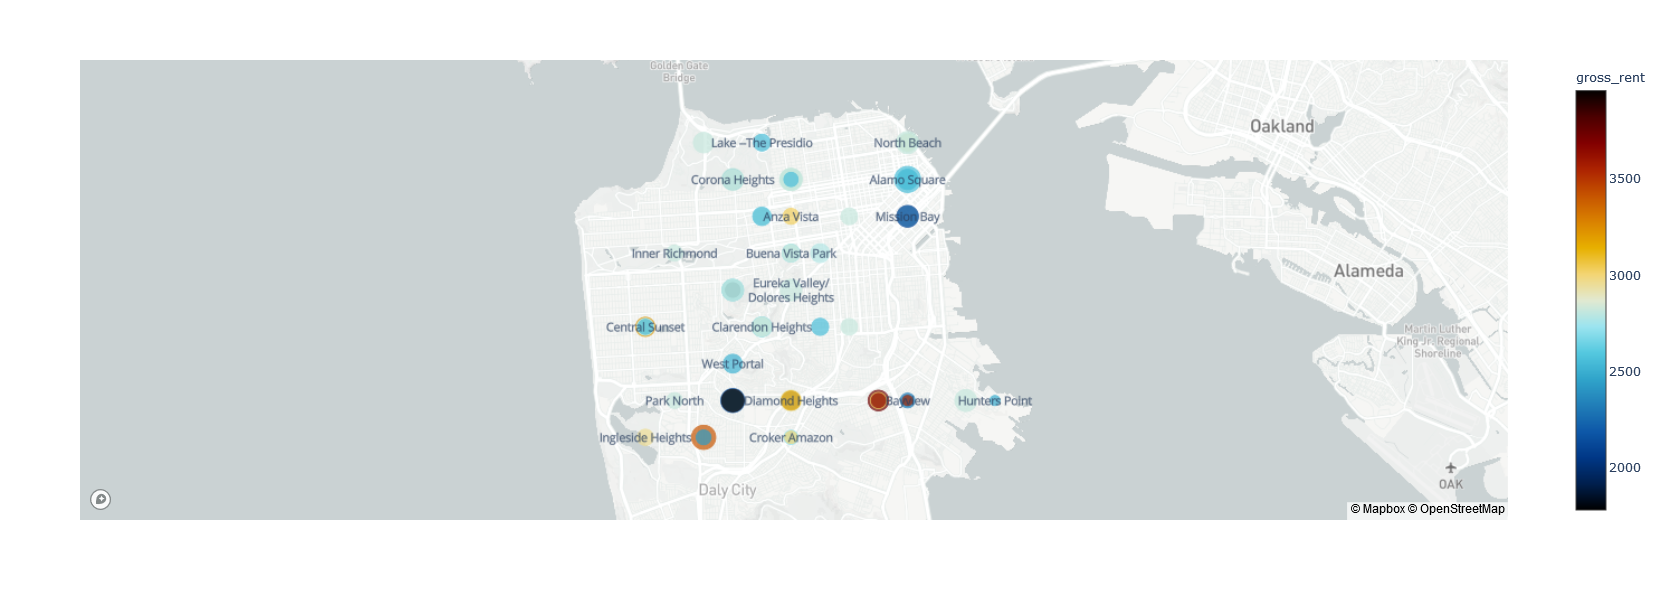

In [122]:
# Create a scatter mapbox to analyze neighborhood info
mapbox = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(mapbox)

px.scatter_mapbox(
    combined_df.reset_index().round(2),
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    zoom=11,
    text="neighborhood"
)